# Acquisitions

In [1]:
%load_ext google.cloud.bigquery
project_id ='prj-vo-aa-p-data-science-exp'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
params = {
    'start_date': '2023-01-01',
    'end_date': '2024-12-31'
}

In [4]:
%%bigquery sales --project $project_id --params $params

WITH
sales AS (

  SELECT 
    event_date,
    session_key,
    premise_event_parameters.premise_uid,
    user_pseudo_id,
    icoms_account_uid,
    is_order,
    i.item_name, 
    i.item_name_unbundled,
    i.item_brand,
    i.item_category,
    i.item_category2,
    i.item_category3,
    i.price,
    premise_event_parameters.premise_postcode,

  FROM 
      `prj-vo-aa-p-ds-customer-uat.dp___digital_product_analytics___ga4.s_ga4__events`,
      UNNEST(items) i
  WHERE 
      event_date BETWEEN @start_date AND @end_date
      AND event_name = 'purchase'
      --AND item_brand = 'cable'
      
),

postcodes AS (

    SELECT DISTINCT
        icoms_id.icoms_premises_uid,
        premises_location.postcode,
    FROM
        `prj-vo-aa-p-data-modellin-prod.data_modelling_base.premises_details_base` 

)

SELECT
  s.*,
  pc.postcode
FROM sales s
  LEFT JOIN postcodes pc
  ON s.premise_uid = pc.icoms_premises_uid

--WHERE icoms_account_uid IS NULL -- new customers?


/Users/jonathan.martin/PythonProjects/general-sql/venv/lib/python3.8/site-packages/google/cloud/bigquery/job/query.py:1892: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
/Users/jonathan.martin/PythonProjects/general-sql/venv/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2257: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [5]:
# sort out date format
sales = sales.astype({
    'event_date': 'datetime64[ns]'
})

In [ ]:
sales

event_date               session_key  premise_uid  \
0       2023-04-03  VXu9sRQHqpkMQRZjG7g7bQ==         <NA>   
1       2023-04-03  0vJHsSpWRVJUHi1SHr7EFg==         <NA>   
2       2023-01-06  Qja++28fupTEEYk25srn/w==         <NA>   
3       2023-01-06  8VntcZHovqGseBl9XA1upg==         <NA>   
4       2023-03-05  VCOvwl0Il5hrIjyZ65WF+w==         <NA>   
...            ...                       ...          ...   
1153273 2023-06-12  Q5gtkl/QTa0KrfKCe37abw==         <NA>   
1153274 2023-02-18  aLCvxaseELaSU+7dPGQJQQ==         <NA>   
1153275 2023-02-18  PuvcVVQNvb1jTKXDulIzpA==         <NA>   
1153276 2023-02-27  kmn9Cgii5AU5HRFP2Hii+A==         <NA>   
1153277 2023-06-02  Ll6+sD90mv7uegVSEO017A==         <NA>   

                user_pseudo_id  icoms_account_uid  is_order  \
0         450873877.1680552127               <NA>         1   
1         784842994.1680436474               <NA>         1   
2        1942874129.1673010659        31868575303         1   
3         470394386.1673029185         2132581601         1   
4        1622495646.1678024910               <NA>         1   
...                        ...                ...       ...   
1153273   913850936.1686568284               <NA>         1   
1153274  1659318579.1676356121               <NA>         1   
1153275  1295104746.1676747990               <NA>         1   
1153276   124364748.1677424473               <NA>         1   
1153277   112408231.1685711301               <NA>         1   

                                                 item_name  \
0        mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
1        mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
2                                                 mixit tv   
3                                                 maxit tv   
4        mobile_app-std-1164bip21-1|unlimited minutes|u...   
...                                                    ...   
1153273  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
1153274  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
1153275  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
1153276  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   
1153277  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   

                                       item_name_unbundled item_brand  \
0        [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
1        [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
2                                               [mixit tv]     virgin   
3                                               [maxit tv]     virgin   
4        [mobile_app-std-1164bip21-1, unlimited minutes...     Mobile   
...                                                    ...        ...   
1153273  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
1153274  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
1153275  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
1153276  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   
1153277  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   

        item_category item_category2 item_category3  price premise_postcode  \
0              mobile           simo      (not set)    7.0             None   
1              mobile           simo      (not set)    7.0             None   
2              bundle          solus             tv   31.0             None   
3              bundle          solus             tv   58.5             None   
4              mobile        handset      (not set)   31.0             None   
...               ...            ...            ...    ...              ...   
1153273        mobile           simo      (not set)    8.0             None   
1153274        mobile           simo      (not set)    4.0             None   
1153275        mobile           simo      (not set)    4.0             None   
1153276        mobile           simo      (not set)    4.0             None   
1153277        mobile      

In [ ]:
sales.query("session_key == '3OiFOH82U0458FBNNJiXOg=='")

event_date               session_key  premise_uid  \
1150794 2023-02-23  3OiFOH82U0458FBNNJiXOg==         <NA>   

               user_pseudo_id  icoms_account_uid  is_order  \
1150794  126025852.1677155711        15067759103         1   

                                                 item_name  \
1150794  mobile_virs-tri-unp-pm3|unlimited minutes|unli...   

                                       item_name_unbundled item_brand  \
1150794  [mobile_virs-tri-unp-pm3, unlimited minutes, u...     Mobile   

        item_category item_category2 item_category3  price premise_postcode  \
1150794        mobile           simo      (not set)    4.0             None   

        postcode  
1150794     None

# Compare to the Online Export

Numbers are quite close, but there's some residual difference which I can't nail down.

It also looks like there's a mismatch in what each data source calls an "order".

https://virginmediauk.sharepoint.com/:f:/r/sites/CONPRPMReports/Shared%20Documents/Reports/Other/UCN0113%20-%20Online%20Report?csf=1&web=1&e=hZwiIY

In [9]:
daily_cable_sales = (sales[(sales.icoms_account_uid.isna()) & (sales.item_brand == 'cable')]  
                     .groupby('event_date')
                     .size())

daily_cable_orders = (sales[(sales.icoms_account_uid.isna()) & (sales.item_brand == 'cable')]  
                     .query("is_order == 1")
                     .groupby('event_date')
                     .size())

In [10]:
comparison = pd.DataFrame({
    "orders (GA4)": daily_cable_orders.loc['2023-12-01':'2023-12-31'].values,
    "sales (GA4)": daily_cable_sales.loc['2023-12-01':'2023-12-31'].values
})


# cut and pasted from Online Export for December 2023
orders_in_online_export = [int(n.replace(',',''))
                           for n in 
                          '1,517	1,250	1,339	1,674	1,540	1,493	1,483	1,259	1,214	1,198	1,554	1,516	1,497	1,392	1,148	1,063	1,138	1,447	1,396	1,390	1,232	1,004	827	566	441	1,045	1,641	1,786	1,650	1,272	765'.split('\t')]


sales_in_online_export = [int(n.replace(',',''))
                           for n in 
                          '1,275	1,040	1,068	1,522	1,408	1,362	1,303	1,070	998	995	1,353	1,360	1,143	1,134	933	896	840	1,058	1,143	1,143	1,047	832	785	553	336	892	1,485	1,580	1,337	1,074	723'.split('\t')]


comparison['orders (Online Export)'] = orders_in_online_export
comparison['sales (Online Export)'] = sales_in_online_export

comparison

orders (GA4)  sales (GA4)  orders (Online Export)  sales (Online Export)
0           1265         1476                    1517                   1275
1           1042         1076                    1250                   1040
2           1108         1116                    1339                   1068
3           1399         1606                    1674                   1522
4           1274         1566                    1540                   1408
5           1160         1447                    1493                   1362
6           1202         1426                    1483                   1303
7            985         1266                    1259                   1070
8            964         1015                    1214                    998
9            921          928                    1198                    995
10          1211         1527                    1554                   1353
11          1216         1524                    1516                   1360
12          1174         1507                    1497                   1143
13          1145         1460                    1392                   1134
14           954         1260                    1148                    933
15           875          938                    1063                    896
16           969          994                    1138                    840
17          1173         1520                    1447                   1058
18          1076         1461                    1396                   1143
19          1117         1498                    1390                   1143
20          1009         1317                    1232                   1047
21           893         1158                    1004                    832
22           731          774                     827                    785
23           492          498                     566                    553
24           402          404                     441                    336
25           927          944                    1045                    892
26          1483         1562                    1641                   1485
27          1585         1677                    1786                   1580
28          1438         1530                    1650                   1337
29          1185         1237                    1272                   1074
30           836          860                     765                    723

/var/folders/pq/1pygt1_j2fn4w2qq_zh70bdh0000gp/T/ipykernel_21041/1792660774.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Daily orders/sales in December - GA4 vs Online Export')

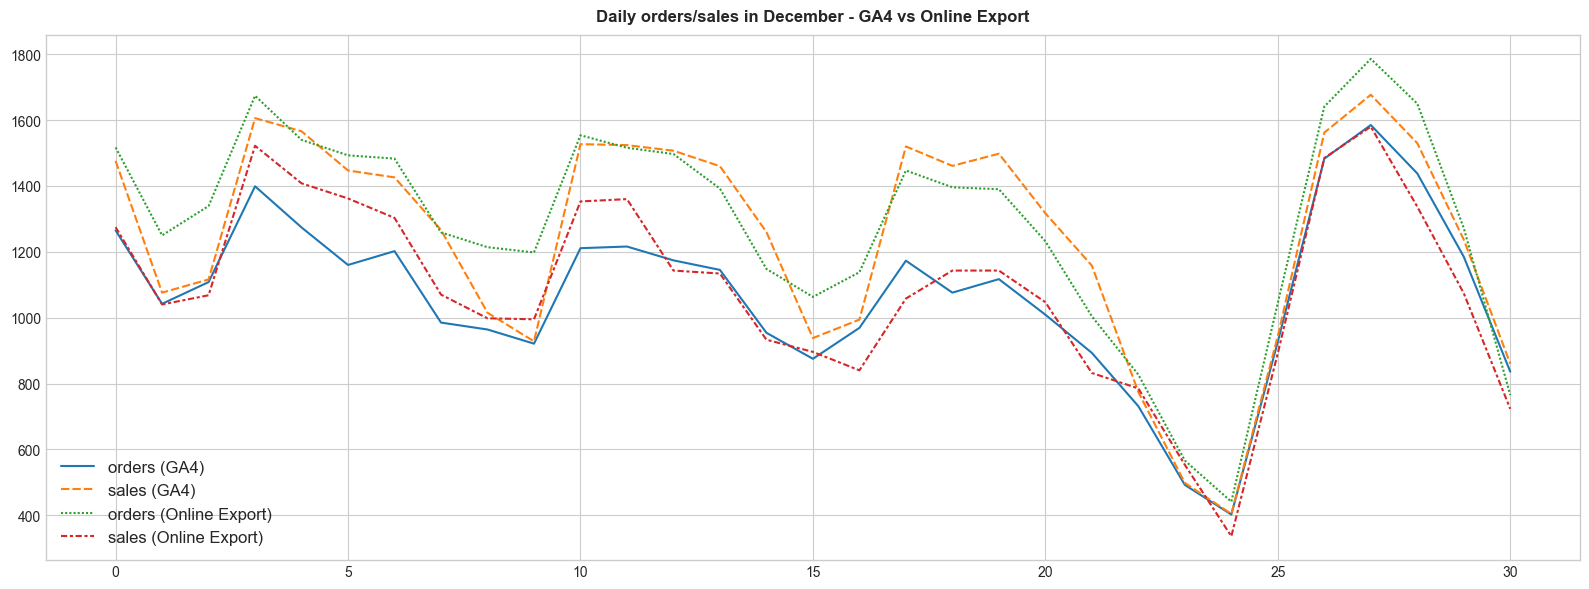

In [11]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(16,6),
    titlesize=12,
    titleweight="bold",
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize=12,
    titleweight="bold",
    titlesize=12,
    titlepad=10,
)

plt.rc(
    "legend",
    fontsize=12
)

plot_params = dict(
    color="0.75",
    style="._",
    markeredgecolor="0.25",
    marketfacecolor="0.25",
    legend=True
)

sns.lineplot(data=comparison)
plt.title(f"Daily orders/sales in December - GA4 vs Online Export")

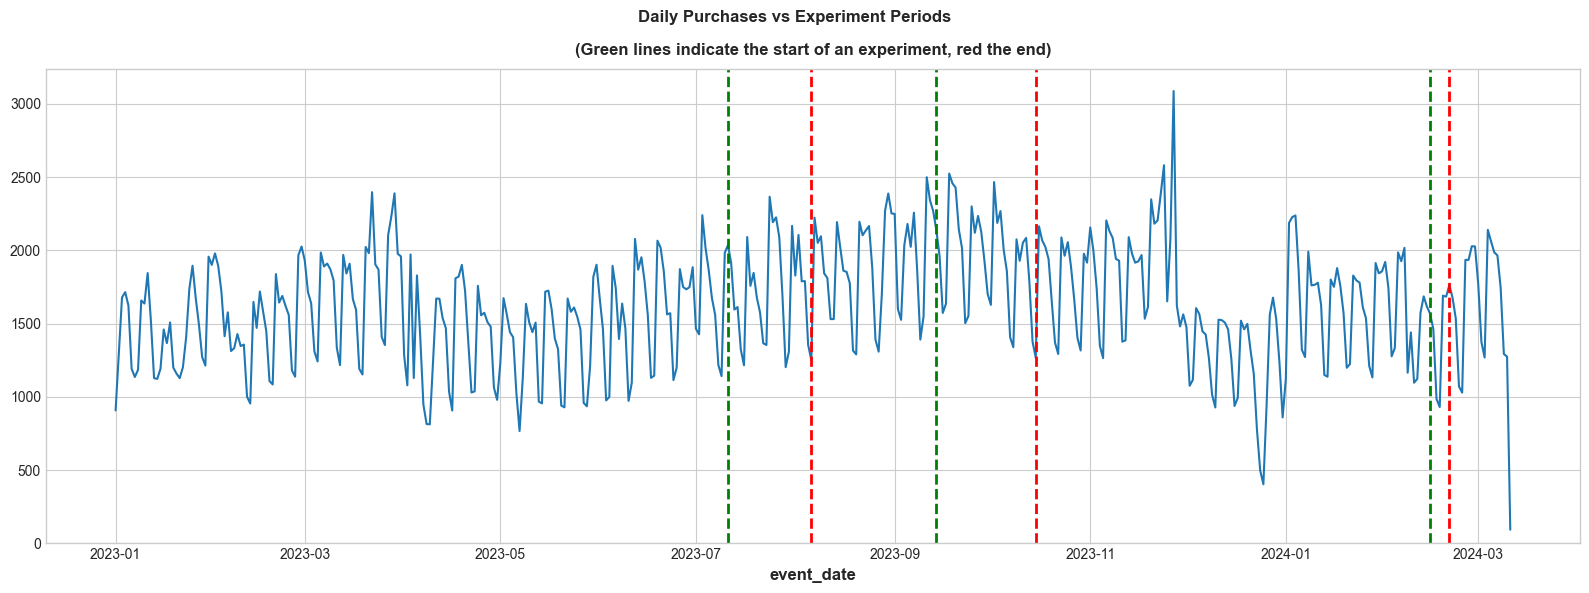

In [42]:
sns.lineplot(data=daily_cable_sales)
plt.suptitle(f"Daily Purchases vs Experiment Periods")
plt.title("(Green lines indicate the start of an experiment, red the end)")
plt.ylim(0)


plt.axvline(pd.to_datetime('2023-07-11'), color='g', linestyle='--', lw=2)  
plt.axvline(pd.to_datetime('2023-08-06'), color='r', linestyle='--', lw=2)  

plt.axvline(pd.to_datetime('2023-09-14'), color='g', linestyle='--', lw=2)  
plt.axvline(pd.to_datetime('2023-10-15'), color='r', linestyle='--', lw=2)  

plt.axvline(pd.to_datetime('2024-02-15'), color='g', linestyle='--', lw=2)  
plt.axvline(pd.to_datetime('2024-02-21'), color='r', linestyle='--', lw=2)  


In [29]:
daily_cable_sales.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05',
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09',
               '2024-03-10', '2024-03-11'],
              dtype='datetime64[ns]', name='event_date', length=436, freq=None)

# How many of these purchases have postcodes attached?

Two ways of getting postcodes here. Which ones is better?

In [6]:
sales[(sales.icoms_account_uid.isna()) & (sales.item_brand == 'cable')].premise_postcode.value_counts(dropna=False, normalize=False)

premise_postcode
None        104552
LE3           1731
CF24          1576
LE2           1571
CR0           1538
             ...  
BD22 7BU         1
IG6 2GD          1
BT42 1LN         1
LS14 1EA         1
CT12 6EQ         1
Name: count, Length: 107660, dtype: int64

In [14]:
# almost all these have postcodes
sales[(sales.icoms_account_uid.isna()) & (sales.item_brand == 'cable')].query("is_order == 1").postcode.value_counts(dropna=False, normalize=True)

postcode
None        0.002674
CF31 5BX    0.000247
PR1 5UT     0.000143
SE1 7GU     0.000116
E14 9GG     0.000115
              ...   
WN5 0DA     0.000002
DN15 6BS    0.000002
BD3 8AW     0.000002
NE22 6NB    0.000002
G12 8BZ     0.000002
Name: proportion, Length: 344499, dtype: float64

In [10]:
sales.query("premise_uid == 229057020")

event_date               session_key  premise_uid         user_pseudo_id  \
4 2024-01-03  MmM6q9XQIWBG/7BdEJrF1Q==    229057020  1855643285.1704275921   

   icoms_account_uid  is_order                  item_name  \
4               <NA>         1  volt m350 fibre broadband   

           item_name_unbundled item_brand item_category item_category2  \
4  [volt m350 fibre broadband]      cable         cable          solus   

  item_category3  price premise_postcode postcode  
4      (not set)   27.0              E14  E14 6JS

...

# Plot of sales since 2023

In [11]:
# we'll just use what the GA4 data calls sales

In [24]:
sales.head()

event_date               session_key  premise_uid        user_pseudo_id  \
0 2024-02-22  AAhOfFhDnhoThHJxXciXcw==         <NA>  515032038.1674146097   
1 2024-02-22  oob7Rqa8ALDtYaw7sDTZ3A==         <NA>  782883816.1673360765   
2 2024-02-22  fRXb4fRKFx2T6MQaS1CTQg==         <NA>  835279418.1669647167   
3 2024-02-22  FAMDByM30aZ+DfXx73OXsQ==         <NA>   21730717.1707593650   
4 2024-02-22                      None         <NA>                  None   

   icoms_account_uid  is_order                         item_name  \
0               <NA>         0                   fibre broadband   
1               <NA>         0                   fibre broadband   
2               <NA>         0                   fibre broadband   
3        11235740202         1  <s>m350</s> m500 fibre broadband   
4               <NA>         1                           mega tv   

                  item_name_unbundled item_brand item_category item_category2  \
0                   [fibre broadband]      cable         cable          solus   
1                   [fibre broadband]      cable         cable          solus   
2                   [fibre broadband]      cable         cable          solus   
3  [<s>m350</s> m500 fibre broadband]     virgin        bundle         triple   
4                           [mega tv]     virgin        bundle           dual   

  item_category3  price postcode  
0      (not set)  38.00     None  
1      (not set)  27.00     None  
2      (not set)  27.00     None  
3      broadband  38.00     None  
4   broadband|tv  78.82     None

In [14]:
daily_cable_sales = (sales[(sales.icoms_account_uid.isna()) & (sales.item_brand == 'cable')]
                     .groupby('event_date')
                     .agg(daily_sales= ('is_order', 'sum'))
                     )

AttributeError: 'QueryJob' object has no attribute 'icoms_account_uid'

In [15]:
sns.lineplot(data=daily_cable_sales.loc['202-01-01':'2024-02-21'])
plt.ylim(0)
plt.title(f"Daily sales in 2024")

NameError: name 'daily_cable_sales' is not defined